<a href="https://colab.research.google.com/github/nupursjsu/Machine-Learning/blob/master/GMM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Predictions

Dataset:- We have the historical dataset collected by american governement on all the wildfires in history of usa from 1900 to 2015.

Hypothesis:- Predicting Wildfire Damage Area based on several different features including
FIRE_YEAR, STAT_CAUSE_DESCR, LATITUDE, LONGITUDE, STATE, DISCOVERY_DATE

## Clustering with GMM

In [0]:
# importing necessary libraries
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/open?id=1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')

In [6]:
#Loading dataset into pandas dataframe
df = pd.read_csv('Fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
#Displaying first few records
df.head()

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [0]:
#Creating a new data frame with required columns
new_df = df[['FIRE_YEAR','STAT_CAUSE_DESCR','LATITUDE','LONGITUDE','STATE','DISCOVERY_DATE','FIRE_SIZE']].copy()

In [9]:
#Displaying top 5 records
new_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10


In [10]:
#Converting the DISCOVERY_DATE field's Julian Date format in Gregorian dates
new_df['DATE'] = pd.to_datetime(new_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
new_df.head() #check the data

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28


In [11]:
#Getting some additional data fields such as month and day of the week.
new_df['MONTH'] = pd.DatetimeIndex(new_df['DATE']).month
new_df['DAY_OF_WEEK'] = new_df['DATE'].dt.weekday_name
new_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,Monday


In [0]:
#Applying GMM from scikit learn library on FIRE_SIZE and MONTH column
gmm=GaussianMixture(n_components=4, covariance_type="spherical").fit(new_df[['MONTH','FIRE_SIZE']])
labels = gmm.predict(new_df[['MONTH','FIRE_SIZE']])

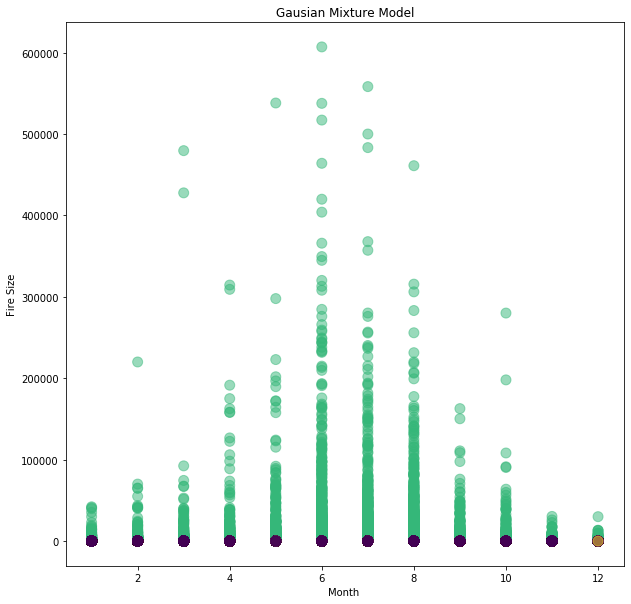

In [37]:
#Plotting the clusters obtained
plt.figure(figsize=(10,10))
plt.scatter(new_df['MONTH'],new_df['FIRE_SIZE'], c=labels, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('Month ')
plt.ylabel('Fire Size')
plt.show()

**The clusters obtained with k-means clustering and GMM are the same and we can see the majority of the big fires have happened in the months of June and July.**

In [0]:
#Applying GMM from scikit learn library on FIRE_SIZE and MONTH column
gmm1=GaussianMixture(n_components=4, covariance_type="spherical").fit(new_df[['LATITUDE','LONGITUDE']])
labels1 = gmm1.predict(new_df[['LATITUDE','LONGITUDE']])

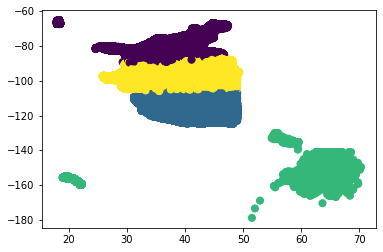

In [16]:
plt.scatter(new_df['LATITUDE'],new_df['LONGITUDE'], c=labels1, s=50, cmap='viridis')
plt.title('Gausian Mixture Model')
plt.xlabel('LATITUDE ')
plt.ylabel('LONGITUDE')

**In the above GMM clustering plot we can see most of the fires have occurred in longitutes between -100 and -120 which is majorly California region which is same as K-means.**

## Using triangulation method as discussed in last class to see if we can get some insightful clusters using GMM.

In [0]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'STAT_CAUSE_DESCR'. 
new_df['STAT_CAUSE_DESCR']= label_encoder.fit_transform(new_df['STAT_CAUSE_DESCR'])


In [0]:
#Finding average fire size by grouping 'STAT_CAUSE_DESCR' and 'MONTH' columns
final_df=new_df.groupby(by=['STAT_CAUSE_DESCR','MONTH'],axis=0)['FIRE_SIZE'].mean().reset_index()

In [19]:
final_df

,STAT_CAUSE_DESCR,MONTH,FIRE_SIZE
0,0,1,22.872258
1,0,2,22.380764
2,0,3,24.725344
3,0,4,28.274510
4,0,5,40.286408
...,...,...,...
151,12,8,27.350717
152,12,9,6.623780
153,12,10,5.447004
154,12,11,10.183954


In [0]:
#Applying GMM from scikit learn library on AVG_FIRE_SIZE, STAT_CAUSE_DESCR and MONTH column
gmm3=GaussianMixture(n_components=4, covariance_type="spherical").fit(final_df)
labels3 = gmm3.predict(final_df)

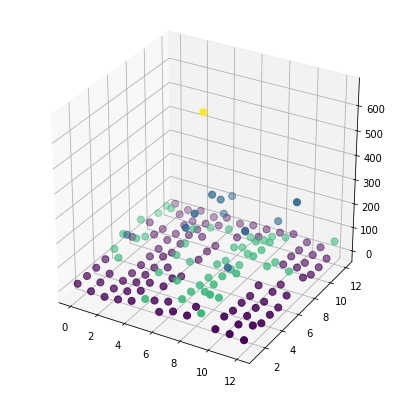

In [27]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure('GMM on wildfire Dataset', figsize=(7,7))
ax = plt.axes(projection = '3d')
ax.scatter(final_df.STAT_CAUSE_DESCR,final_df.MONTH,final_df.FIRE_SIZE , cmap='viridis', s=50, c=labels3)

**By clustering on the basis of average fire size, cause of fire and month, it can be seen that most of the big fires have occurred in the months of June and July.**